# Hint 

1. When the user presses on the ✅ button, it means that they know the current word on the flashcard and that word should be removed from the list of words that might come up.

e.g. If french_words.csv had only 3 records:

`
    chaque,each
    parlé,speak
    arrivé,come
`

After the user has seen parlé,speak  it should be removed from the list of words that can come up again.

2. The updated data should be saved to a new file called words_to_learn.csv

e.g. words_to_learn.csv

`
    chaque,each
    arrivé,come
`

3. The next time the program is run, it should check if there is a words_to_learn.csv file. If it exists, the program should use those words to put on the flashcards. If the words_to_learn.csv does not exist (i.e., the first time the program is run), then it should use the words in the french_words.csv

We want our flashcard program to only test us on things we don't know. So if the user presses the ✅ button, that means the current card should not come up again.

4. The remove() method can remove elements from a list. e.g. https://www.w3schools.com/python/ref_list_remove.asp

5. You can create a new csv file from a dictionary using DataFrame.to_csv() e.g. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

6. If you don't want to create an index for the new csv, you can set the index parameter to False. e.g.

`data.to_csv("filename.csv", index=False)`

### main.py 

In [2]:
import tkinter
from tkinter import *
from tkinter import messagebox
import pandas as pd
import random

In [3]:
#Constants
BACKGROUND_COLOR = "#B1DDC6"
SET_FONT1 = ("Arial", 40, "italic")
SET_FONT2 = ("Arial", 60, "bold")
current_card = {}
to_learn = {}

In [4]:
try:
    data = pd.read_csv("data/words_to_learn.csv")
except FileNotFoundError:
    original_data = pd.read_csv("data/french_words.csv")
    to_learn = original_data.to_dict(orient="records")
else:
    to_learn = data.to_dict(orient="records")

In [5]:
#Function
#Next Card for Known & Unknown Button

def next_card():
    global current_card, flip_timer
    window.after_cancel(flip_timer)
    current_card = random.choice(to_learn)
    canvas.itemconfig(card_title, text="French", fill="black")
    canvas.itemconfig(card_word, text=current_card["French"], fill="black")
    canvas.itemconfig(card_background, image=card_front_img)
    flip_timer = window.after(3000, func=flip_card) #3000 ms ~ 3s

In [6]:
#Function
#Flip cards to show english translation of the current card

def flip_card():
    canvas.itemconfig(card_title, text="English", fill="white")
    canvas.itemconfig(card_word, text=current_card["English"], fill="white")
    canvas.itemconfig(card_background, image=card_back_img)
    

In [7]:
#Function
#Known Button
def is_known():
    to_learn.remove(current_card)
    data = pd.DataFrame(to_learn)
    data.to_csv("data/words_to_learn.csv", index=False)
    next_card()

In [8]:
#UI

window = Tk()
window.title("Flash Card App")
window.config(padx=50, pady=50, bg=BACKGROUND_COLOR)

flip_timer = window.after(3000, func=flip_card) #3000 ms ~ 3s

#Canvas Widget
canvas = Canvas(width=800, height=526)
card_front_img = PhotoImage(file="images/card_front.png")
card_back_img = PhotoImage(file="images/card_back.png")
card_background = canvas.create_image(480, 263, image=card_front_img)
card_title = canvas.create_text(400, 150, text="Title", font=SET_FONT1)
card_word = canvas.create_text(400, 263, text="word", font=SET_FONT2)
canvas.config(bg=BACKGROUND_COLOR, highlightthickness=0)
canvas.grid(row=0, column=0, columnspan=2)

#Button Widget
cross_image = PhotoImage(file="images/wrong.png")
unknown_button = Button(image=cross_image, highlightthickness=0, command=next_card)
unknown_button.grid(row=1, column=0)

check_image = PhotoImage(file="images/right.png")
known_button = Button(image=check_image, highlightthickness=0, command=is_known)
known_button.grid(row=1, column=1)

next_card()

window.mainloop()

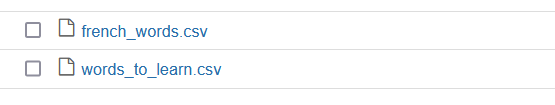